In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import re
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
!pip install folium
!pip install wordcloud -q
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Populating the interactive namespace from numpy and matplotlib


In [ ]:
!pip install wordcloud -q

In [ ]:
df = pd.read_csv('hashtag_data.csv',sep=';',encoding='UTF-8')
hashtags = df.dropna(subset=['hashtags'], axis=0)['hashtags'].apply(
    lambda x: [re.sub('[\'|\[|\]|\s]+', '', x).lower()])

In [ ]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
user,eltonarabia77,SabrinaSato,Flamengo,chicobarney,SenadorRogerio
tweet_type,popular,popular,popular,popular,popular
verified,True,True,True,True,True
followers,96177,11088027,8128462,497047,82257
hashtags,['AlNassr'],['IlhaRecord'],['VamosFlamengo'],['PorscheDoGugu'],['CPIdaCovid']


In [ ]:
df.describe()

,Unnamed: 0,followers
count,29218.000000,2.921800e+04
mean,14608.500000,6.347479e+03
std,8434.654419,2.041476e+05
min,0.000000,0.000000e+00
25%,7304.250000,1.210000e+02
50%,14608.500000,3.730000e+02
75%,21912.750000,1.260000e+03
max,29217.000000,1.108807e+07


In [ ]:
df.groupby('hashtags')['hashtags'].value_counts()

hashtags                                                   hashtags                                                 
['021fest']                                                ['021fest']                                                   1
['07SetVistaPreto']                                        ['07SetVistaPreto']                                           1
['07deSetembroSeráGigante', 'FechadoComBolsonaroAte2026']  ['07deSetembroSeráGigante', 'FechadoComBolsonaroAte2026']     1
['07deSetembroSeráGigante']                                ['07deSetembroSeráGigante']                                   2
['07deSetembroVaiSerGigante']                              ['07deSetembroVaiSerGigante']                                21
                                                                                                                        ..
['𝑷𝑬𝑵𝑺𝑬𝑵𝑰𝑺𝑺𝑶', '𝑺𝑬𝑱𝑨𝑭𝑬𝑳𝑰𝒁']                                ['𝑷𝑬𝑵𝑺𝑬𝑵𝑰𝑺𝑺𝑶', '𝑺𝑬𝑱𝑨𝑭𝑬𝑳𝑰𝒁']                                   1
['𝑺𝑪𝑪𝑷', '𝑪𝒐𝒓𝒊𝒏𝒕𝒉𝒊𝒂𝒏𝒐'

In [ ]:
cont = df[u'user'].value_counts()
cont

LlausNando        339
ich_carolina      296
MonicaVilhena6    276
RomeoArantes      247
ChaspDelaro       221
                 ... 
FrontaldaIlha       1
Lari_crf027         1
Daniisantossq       1
jojnunes            1
ricardosnasc        1
Name: user, Length: 10757, dtype: int64

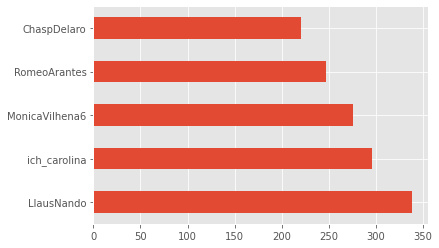

In [ ]:
#df2 = dataset.groupby('hashtags')['user'].count()
df[u'user'].value_counts().head().plot.barh()

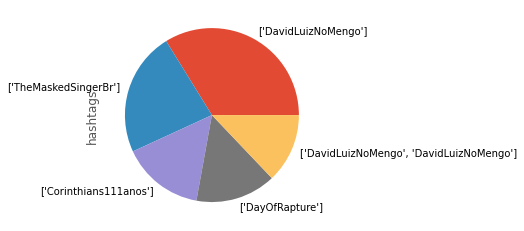

In [ ]:
df[u'hashtags'].value_counts().head().plot.pie()

#tipo do tweet (grafico de barras popular ou não), conta verificada ou não (grafico de barras), quantidade de seguidores (histograma)

recent     29211
popular        7
Name: tweet_type, dtype: int64


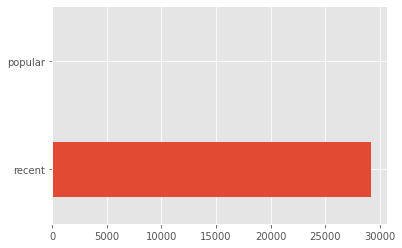

In [ ]:
tweet_type = df[u'tweet_type'].unique()
cont = df[u'tweet_type'].value_counts()
df['tweet_type'].value_counts().plot(kind = "barh",x ='tweet_type')
print(cont)


False    29007
True       211
Name: verified, dtype: int64

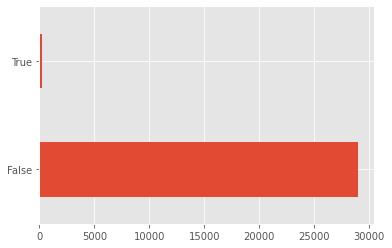

In [ ]:
verifieds = df[u'verified'].unique()
verified_cont = df[u'verified'].value_counts()
df['verified'].value_counts().plot(kind = "barh")
verified_cont

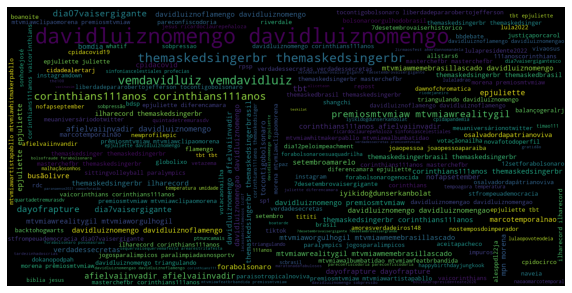

In [ ]:
hashtags = df.dropna(subset=['hashtags'], axis=0)['hashtags'].apply(
    lambda x: [re.sub('[\'|\[|\]|\s]+', '', x).lower()])
all_hashtags = " ".join([" ".join(s) for s in hashtags])

wordcloud = WordCloud(background_color="black",
                      width=1600, height=800).generate(all_hashtags)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);

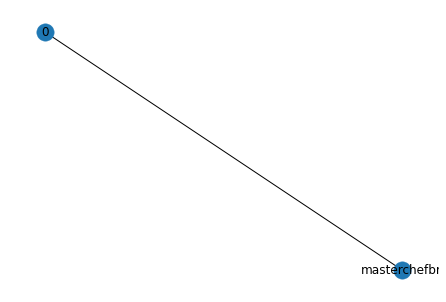

In [ ]:
G = nx.Graph()

for index, row in df.iterrows():
  hashtag_list = re.sub('[\'|\[|\]|\s]+', '', row['hashtags']).lower().split(',')
  hashtag_list = list(dict.fromkeys(hashtag_list))
for node in hashtag_list:
    if (not G.has_node(node)):
      G.add_node(node, weight = 1)
      print(node)
    else:
      G.nodes[node]['weight'] += 1
while (len(hashtag_list) > 1):
    head_node = hashtag_list.pop(0)
for node in hashtag_list:
      if (not G.has_edge(head_node, node)):
        G.add_edge(head_node, node, weight = 1)
      else:
        G[head_node][node]['weight'] += 1

nx.draw(G, with_labels=True)


In [ ]:
list_hashtag = df['hashtags'].tolist()
for i in range(10):
  print(list_hashtag[i])
list_hashtag = df['hashtags'].to_numpy()
for i in range(10):
  print(len(list_hashtag[i]))




['AlNassr']
['IlhaRecord']
['VamosFlamengo']
['PorscheDoGugu']
['CPIdaCovid']
['MarcoTemporalNao']
['Covid19']
['Dia07VaiSerGIGANTE']
['VemDavidLuiz', 'VemDavidLuiz']
['VemDavidLuiz', 'VemDavidLuiz', 'VemDavidLuiz', 'VemDavidLuiz']
11
14
17
17
14
20
11
22
32
64


In [ ]:
core =0
shell =0
for i in nx.k_core(G,core):
  print(i)
for i in nx.k_shell(G,core):
  print(i)

In [ ]:
set([v for k,v in nx.core_number(G).items()])
list(nx.k_shell(G,13))

['lifestyle',
 'vida',
 'love',
 'heitor',
 'tbt',
 'family',
 'mom',
 'mãe',
 'dad',
 'life',
 'familia',
 'live',
 'pai',
 'smile']

In [ ]:
dados = pd.read_csv("hashtag_data.csv", sep = ";", index_col = 0)
G = nx.Graph()

for index, row in dados.iterrows():
  hashtag_list = re.sub('[\'|\[|\]|\s]+', '', row['hashtags']).lower().split(',')
  hashtag_list = list(dict.fromkeys(hashtag_list))

  for node in hashtag_list:
    if (not G.has_node(node)):
      G.add_node(node, weight = 1)
    else:
      G.nodes[node]['weight'] += 1 

  while (len(hashtag_list) > 1):
    head_node = hashtag_list.pop(0)

    for node in hashtag_list:
      if (not G.has_edge(head_node, node)):
        G.add_edge(head_node, node, weight = 1)
      else:
        G[head_node][node]['weight'] += 1
nx.draw(G, with_labels=True)

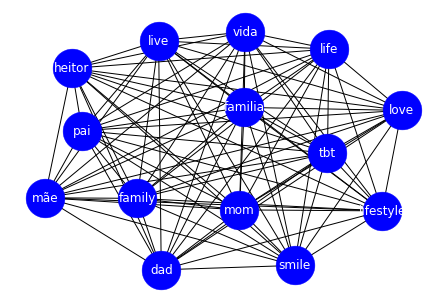

In [ ]:
core =0
shell =0
set([v for k,v in nx.core_number(G).items()])
H = G.subgraph(list(nx.k_shell(G,13)))
nx.draw(H, with_labels=True,node_size=1500,node_color='blue',font_color='white')
#for i in nx.k_core(G,core):
#  print(i)

#for i in nx.k_shell(G,core):
#  print(i)

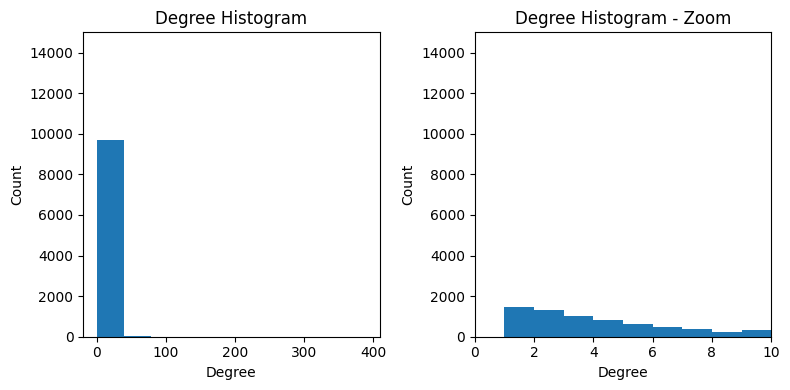

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,15000)

plt.tight_layout()
plt.show()

In [ ]:
core = [node for node, deg in dict(G.degree()).items() if deg >= 2]
gsub = nx.subgraph(G, core)
print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))
nx.write_graphml(gsub, "cna.graphml")

5653 nodes, 16628 edges


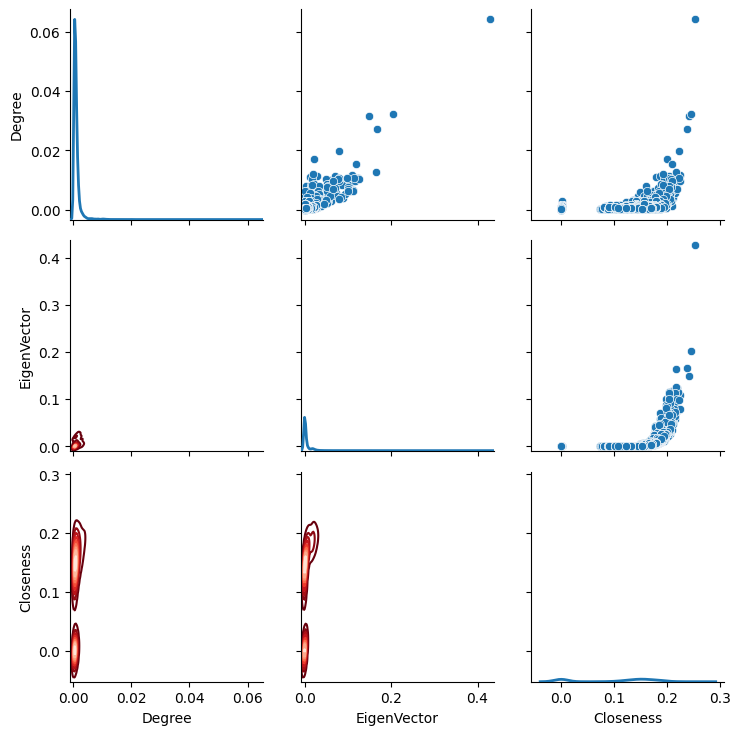

In [ ]:
dc = pd.Series(nx.degree_centrality(gsub))
ec = pd.Series(nx.eigenvector_centrality(gsub))
cc = pd.Series(nx.closeness_centrality(gsub))

df = pd.DataFrame.from_dict({
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.head()

fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)

plt.savefig('all.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()